### Color Picker

In [1]:
from dash import Dash, html, Input, Output, callback
import dash_daq as daq

app = Dash(__name__)

app.layout = html.Div([
    daq.ColorPicker(
        id='my-color-picker-1',
        label='Color Picker',
        value=dict(hex='#119DFF', rgb=dict(r=17, g=157, b=255, a=1))
    ),
    html.Div(id='color-picker-output-1')
])

@callback(
    Output('color-picker-output-1', 'children'),
    Input('my-color-picker-1', 'value')
)
def update_output(value):
    hex = value['hex']
    rgba = value['rgb']
    return f'The selected color is {hex} and rgba({rgba['r']}, {rgba['g']}, {rgba['b']}, {rgba['a']})'

if __name__ == '__main__':
    app.run(debug=True)


### Data Loading and Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

df = pd.read_csv('AAPL_1D_01012007-12072023.csv')
df.head()

,volume,vwap,open,close,high,low,time,transactions
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,1167800400,189737
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,1167886800,136333
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,1167973200,141050
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,1168232400,130547
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,1168318800,569578


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   volume        4159 non-null   float64
 1   vwap          4159 non-null   float64
 2   open          4159 non-null   float64
 3   close         4159 non-null   float64
 4   high          4159 non-null   float64
 5   low           4159 non-null   float64
 6   time          4159 non-null   int64  
 7   transactions  4159 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 260.1 KB


In [4]:
df.describe()


,volume,vwap,open,close,high,low,time,transactions
count,4.159000e+03,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4.159000e+03,4.159000e+03
mean,3.662925e+08,46.391382,46.362788,46.396058,46.881127,45.865790,1.428315e+09,2.709318e+05
std,3.724793e+08,50.277557,50.235593,50.293482,50.843874,49.680104,1.505279e+08,2.510859e+05
min,2.422234e+07,2.841000,2.835400,2.792900,2.928600,2.792900,1.167800e+09,3.048700e+04
25%,1.067497e+08,11.936200,11.955700,11.947150,12.028400,11.853600,1.297876e+09,1.128150e+05
50%,2.136463e+08,25.885200,25.775000,25.825000,26.262800,25.680000,1.428466e+09,1.782460e+05
75%,4.965321e+08,52.154150,52.263750,52.231250,52.626250,51.796250,1.558627e+09,3.259555e+05
max,3.373042e+09,193.102000,193.780000,193.970000,194.480000,191.760000,1.689134e+09,2.966979e+06


In [5]:
df['timestamp'] = df['time'].copy()
df['time'] = pd.to_datetime(df['time'], unit='s')
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['date'] = df['time'].dt.date
df['weekday'] = df['time'].dt.weekday

df.head()

,volume,vwap,open,close,high,low,time,transactions,timestamp,year,month,day,date,weekday
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,2007-01-03 05:00:00,189737,1167800400,2007,1,3,2007-01-03,2
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,2007-01-04 05:00:00,136333,1167886800,2007,1,4,2007-01-04,3
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,2007-01-05 05:00:00,141050,1167973200,2007,1,5,2007-01-05,4
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,2007-01-08 05:00:00,130547,1168232400,2007,1,8,2007-01-08,0
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,2007-01-09 05:00:00,569578,1168318800,2007,1,9,2007-01-09,1


### Data Visualization

In [6]:
fig = go.Figure()

for column in ['vwap', 'open', 'close']:
    fig.add_trace(go.Scatter(x=df['date'], y=df[column], name=column, mode='lines'))

fig.add_trace(go.Scatter(
    x=df['date'].tolist() + df['date'].tolist()[::-1],
    y=df['high'].tolist() + df['low'].tolist()[::-1],
    fill='toself',
    fillcolor='rgba(172, 204, 227, 0.5)',
    line=dict(color='rgba(255,255,255,0)'),
    name='min-max',
    mode='lines+markers',
    # hoverinfo="skip",
    # showlegend=False
))

fig.add_trace(go.Bar(x=df['date'], y=df['transactions'], name='transactions', yaxis='y2', opacity=0.9, marker=dict(color='blue')))

fig.update_layout(
    title='Stock Data and Transactions Over Time',
    xaxis_title='Date',
    yaxis_title='Price',
    yaxis2=dict(title='Transactions', overlaying='y', side='right'),
    legend_title='Metrics',
    hovermode='x',
    height=600,
    width=1200,
    plot_bgcolor='white', 
    paper_bgcolor='white' 
)

fig.show()



It seems like there is a pattern that when price starts to go down transactions peak. Then transactions steadily decreace while price is down and when price starts to go up again transactions starts to rise gradually.

And also can highlight 3 distinct periods:
1. from 2007 to the begining of 2019 - there rise was relaticely smooth.
2. to 2021 - very steep rise.
3. oscillations from 2021 to 2023



In [7]:
df.columns


Index(['volume', 'vwap', 'open', 'close', 'high', 'low', 'time',
       'transactions', 'timestamp', 'year', 'month', 'day', 'date', 'weekday'],
      dtype='object')

In [8]:
df['density'] = df['volume'] / df['transactions'] 
df['log_volume'] = np.log(df['volume'])
df['log_transactions'] = np.log(df['transactions'])


vwap ,high, low, open and close are almost perfectly correlated so we can use only one of them when appropiate. For convinience we can use vwap.


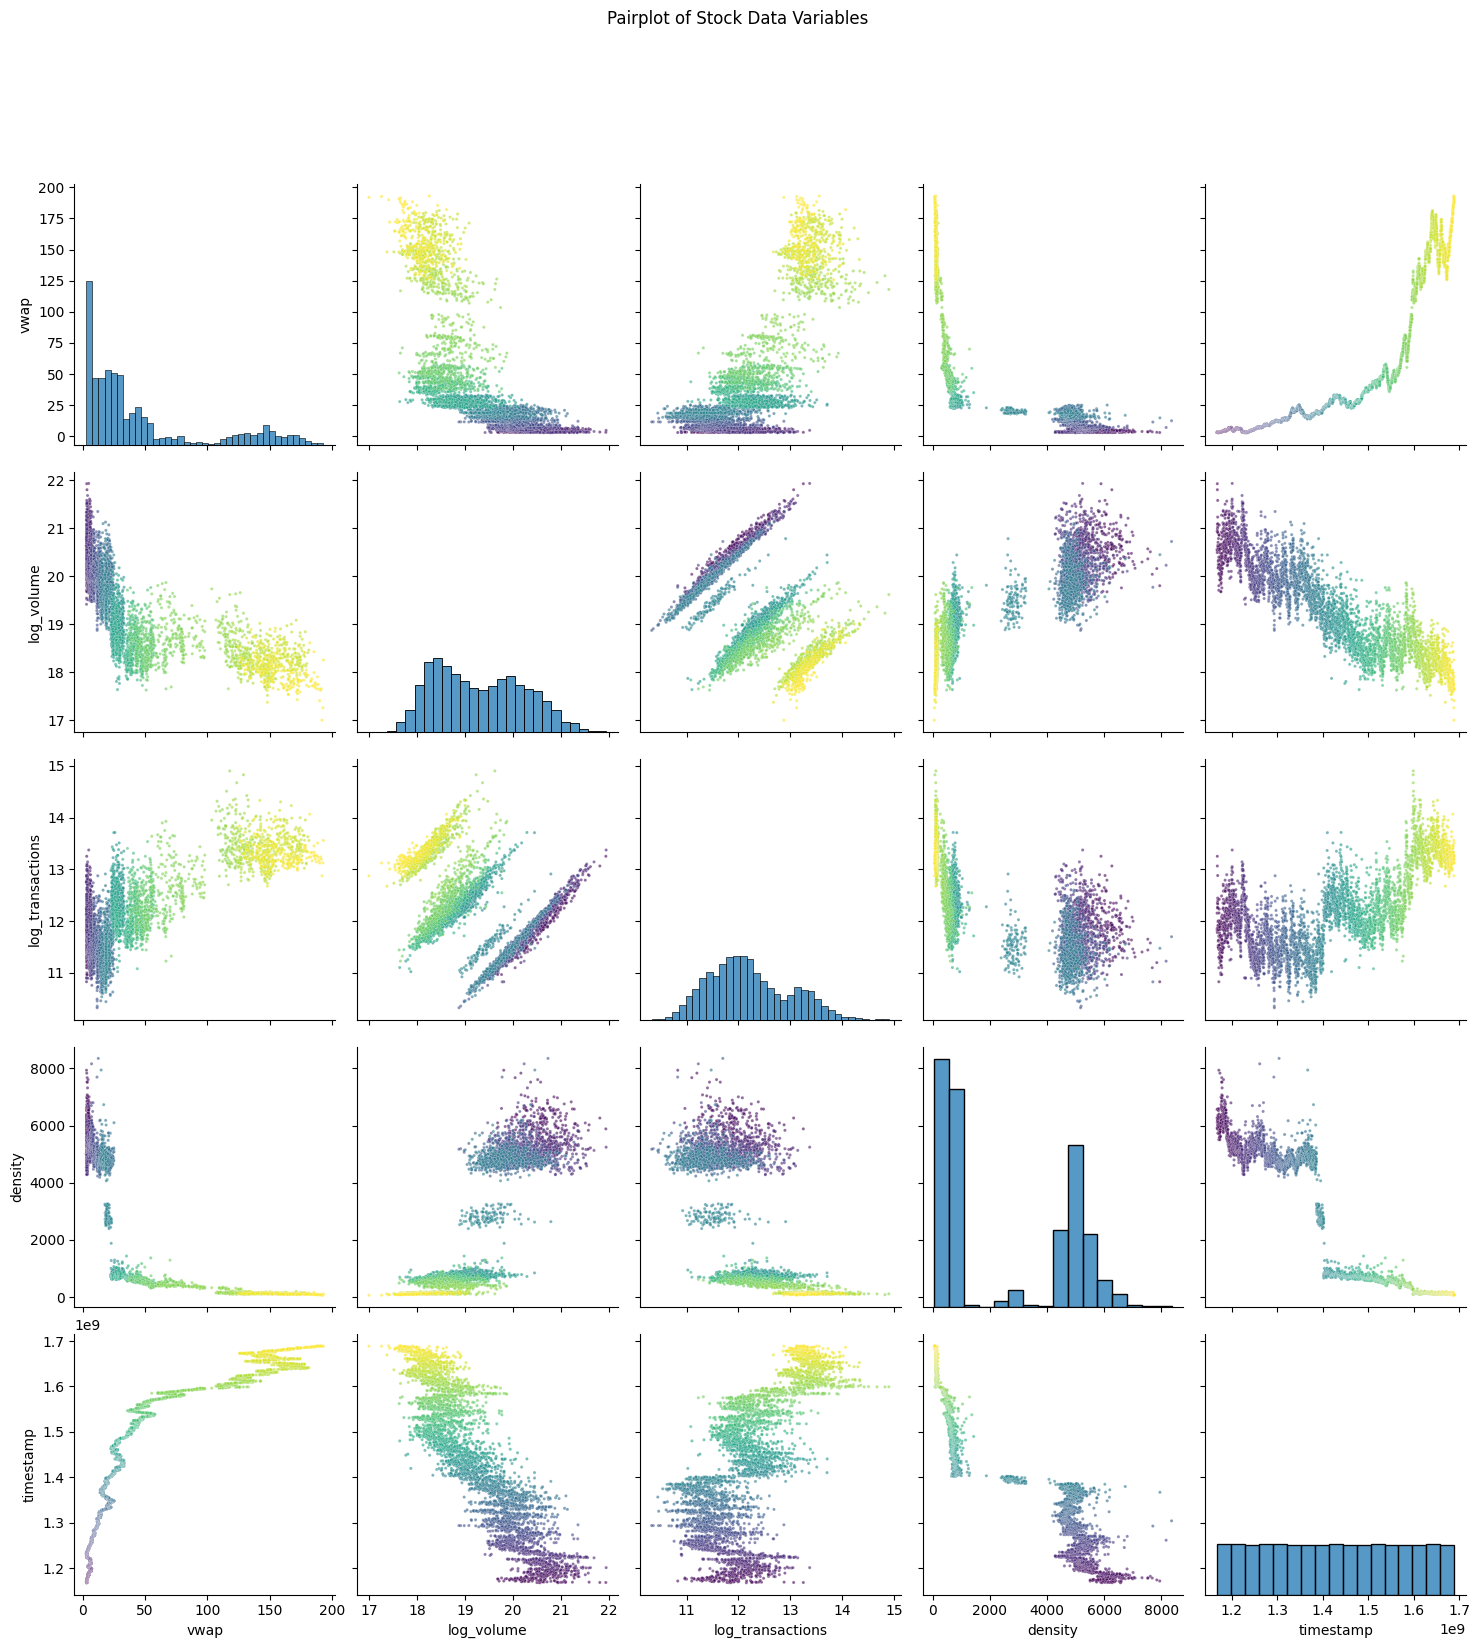

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plot_columns = ['vwap', 'log_volume', 'log_transactions', 'density', 'timestamp']

# Create a color map based on timestamp
color_map = plt.cm.viridis((df['timestamp'] - df['timestamp'].min()) / (df['timestamp'].max() - df['timestamp'].min()))

g = sns.pairplot(df[plot_columns], height=3, aspect=1, plot_kws={'alpha': 0.6, 's': 5, 'c': color_map})

plt.suptitle("Pairplot of Stock Data Variables", y=1.1)
plt.show()


**Key observations:**
* Amount of transactions and volume have pronounced linear relationship with 3-4 distinct lines correspondint to different time periods.
* Stock popularity grows over time based on transaction amount growth.
* However, overall volume decreases. It is probably caused by radical price increas.  

### Statistical Analysis


In [10]:
from scipy import stats


In [11]:
df.dtypes

volume                     float64
vwap                       float64
open                       float64
close                      float64
high                       float64
low                        float64
time                datetime64[ns]
transactions                 int64
timestamp                    int64
year                         int32
month                        int32
day                          int32
date                        object
weekday                      int32
density                    float64
log_volume                 float64
log_transactions           float64
dtype: object

#### Correlation matrix

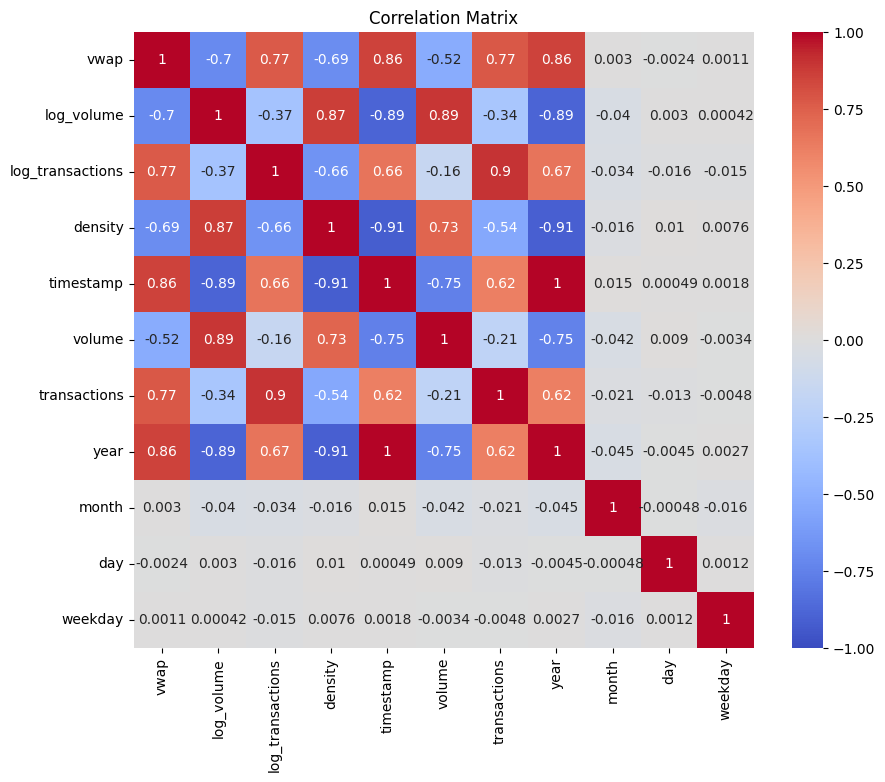

In [12]:
corr_matrix =df[[*plot_columns, 'volume', 'transactions', 'year', 'month', 'day', 'weekday']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmax=1, vmin=-1)
plt.title('Correlation Matrix')
plt.show()


Here we can see numerical quantity of our observations specified earlier.

#### Time Series Analysis

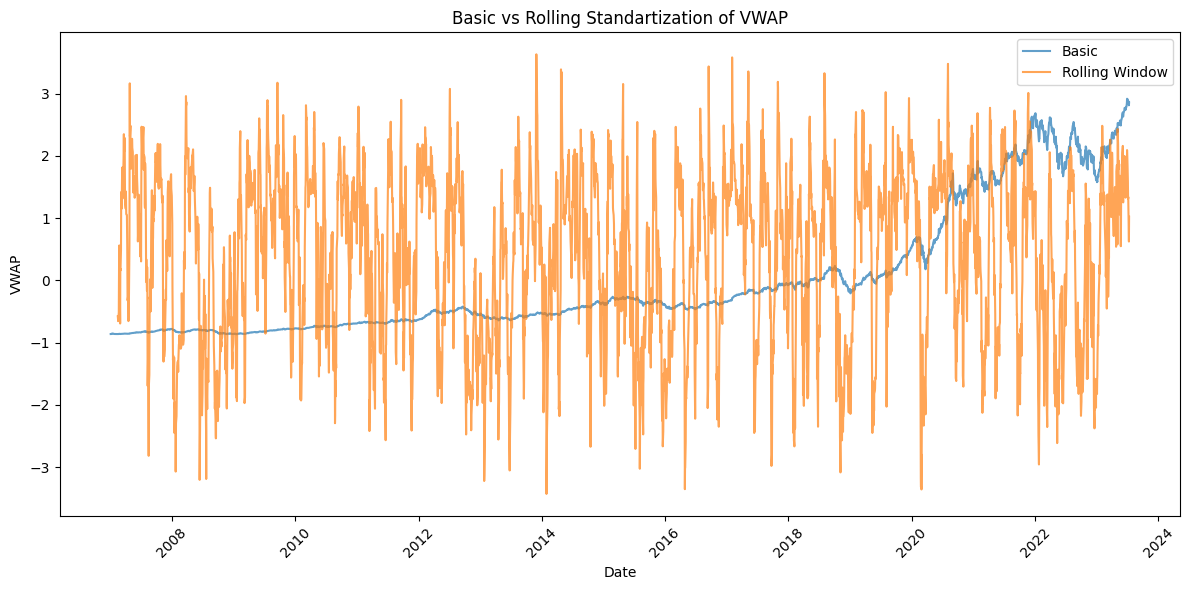

In [13]:
rw = 30

df['vwap_r_mean'] = df['vwap'].rolling(window=rw).mean()
df['vwap_r_std'] = df['vwap'].rolling(window=rw).std()

df['vwap_rw_st'] = (df['vwap'] - df['vwap_r_mean']) / df['vwap_r_std']
df['vwap_st'] = (df['vwap'] - df['vwap'].mean()) / df['vwap'].std()

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['vwap_st'], label='Basic', alpha=0.7)
plt.plot(df['date'], df['vwap_rw_st'], label='Rolling Window', alpha=0.7)
plt.title('Basic vs Rolling Standartization of VWAP')
plt.xlabel('Date')
plt.ylabel('VWAP')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Side Note**: I did some research and studied some theory behind time series analysis but I'm still not 100% sure that what I did is correct. So any feedback would be much appreciated! 

If we want to compare values in different periods of a variable that changes in time and test hypothesis, we need to first make it stationaryю Otherwise, fenomena like trend and seasonality may lead to false results.

In our case we have strong trend and also variance changes over time.

To deal with trend we subtract moving average and devide by moving std to make variance change effect negligable 

#### Stationarity Test

In [14]:
from statsmodels.tsa.stattools import kpss

def test_stationarity(timeseries, series_name):
    print(f"Results of KPSS Test for {series_name}:")
    kpss_stat, p_value, lags, *crit = kpss(timeseries, regression='c', nlags="auto")
    print('Statistic', kpss_stat)
    print('P-value', p_value)
    print('Lags Used', lags)
    
    if p_value <= 0.05:
        print(f"{series_name} is likely non-stationary (reject H0)")
    else:
        print(f"{series_name} is likely stationary (fail to reject H0)")
    print("\n")

test_stationarity(df['vwap_st'].dropna(), 'vwap_st')
test_stationarity(df['vwap_rw_st'].dropna(), 'vwap_rw_st')


Results of KPSS Test for vwap_st:
Statistic 7.7730007110416475
P-value 0.01
Lags Used 40
vwap_st is likely non-stationary (reject H0)


Results of KPSS Test for vwap_rw_st:
Statistic 0.05742184496068727
P-value 0.1
Lags Used 37
vwap_rw_st is likely stationary (fail to reject H0)




C:\Users\Vlad\AppData\Local\Temp\ipykernel_23664\4243952539.py:5: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


C:\Users\Vlad\AppData\Local\Temp\ipykernel_23664\4243952539.py:5: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




We confirmed that moving average standartization made series stationary!

#### Distribution Normality Test

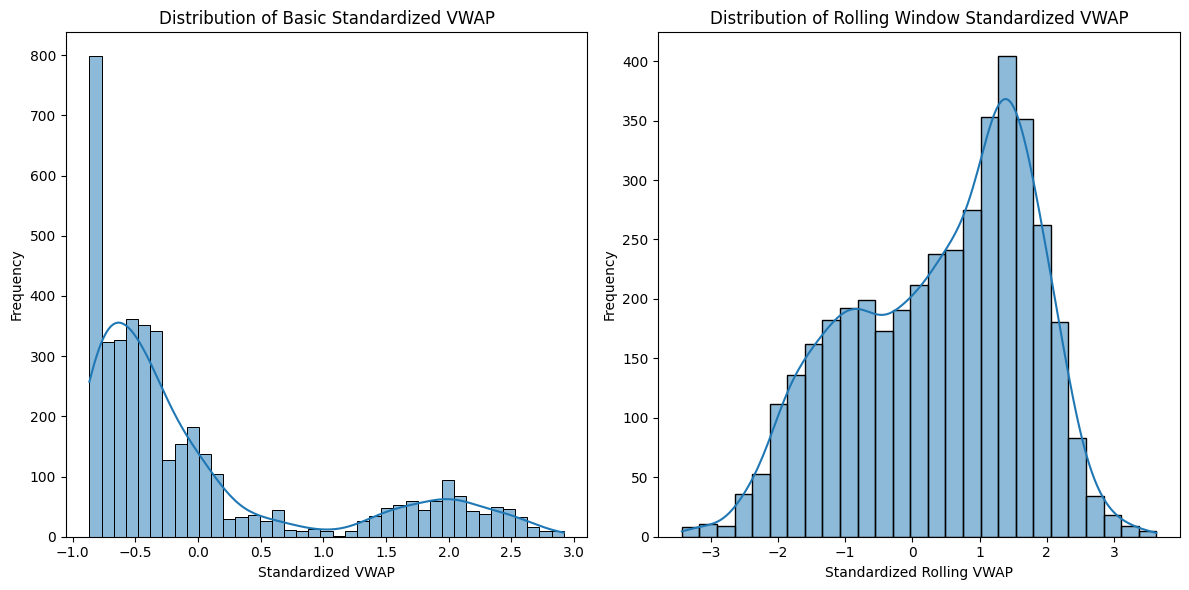

In [15]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['vwap_st'].dropna(), kde=True)
plt.title('Distribution of Basic Standardized VWAP')
plt.xlabel('Standardized VWAP')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['vwap_rw_st'].dropna(), kde=True)
plt.title('Distribution of Rolling Window Standardized VWAP')
plt.xlabel('Standardized Rolling VWAP')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


On the second chart, we see a peak to the right of zero. I guess the peak is associated with the overall rise in the stock price. 

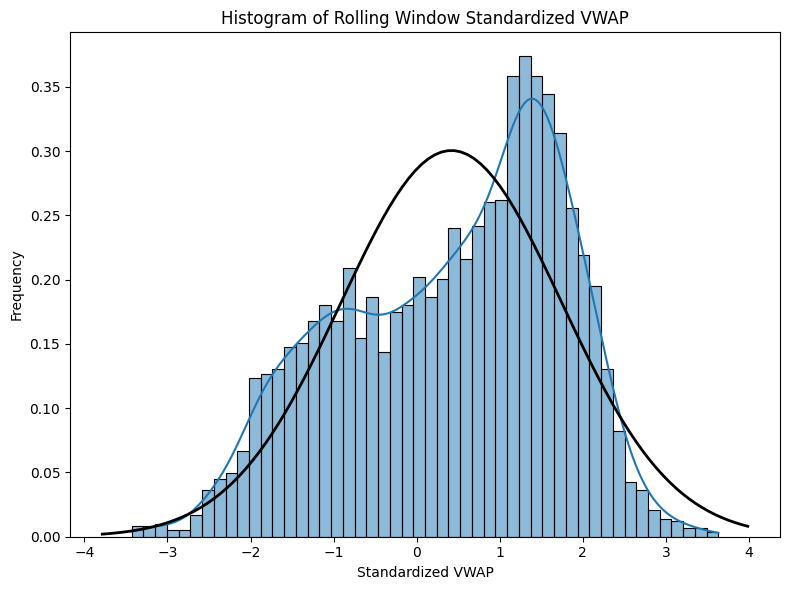

Shapiro-Wilk test statistic: 0.9669
p-value: 0.0000
The distribution of vwap_rw_st is likely not normal (reject H0)


In [16]:
from scipy import stats
import matplotlib.pyplot as plt

statistic, p_value = stats.shapiro(df['vwap_rw_st'].dropna())

plt.figure(figsize=(8, 6))

ax = sns.histplot(data=df['vwap_rw_st'].dropna(), bins=50, kde=True, stat='density',  alpha=0.5)
# sns.kdeplot(data=df['vwap_rw_st'].dropna(), ax=ax, linewidth=3)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, df['vwap_rw_st'].mean(), df['vwap_rw_st'].std())
plt.plot(x, p, 'k', linewidth=2)
plt.title('Histogram of Rolling Window Standardized VWAP')
plt.xlabel('Standardized VWAP')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f"Shapiro-Wilk test statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value > 0.05:
    print("The distribution of vwap_rw_st is likely normal (fail to reject H0)")
else:
    print("The distribution of vwap_rw_st is likely not normal (reject H0)")


So distribution is not normal

#### Autocorrelation Analysis

In [17]:
from statsmodels.tsa.stattools import acf
from scipy import stats

nlags = 366

acf_vwap_st, confint_vwap_st = acf(df['vwap_st'].dropna(), nlags=nlags, alpha=0.05)
acf_vwap_rw_st, confint_vwap_rw_st = acf(df['vwap_rw_st'].dropna(), nlags=nlags, alpha=0.05)

acf_vwap_st.shape, confint_vwap_st.shape, acf_vwap_rw_st.shape, confint_vwap_rw_st.shape

((367,), (367, 2), (367,), (367, 2))

In [18]:
stats.norm.ppf(0.025)

np.float64(-1.9599639845400545)

In [19]:
fig = go.Figure()

lags = list(range(nlags + 1))
error = 0.05
ts_len = len(df['vwap'].dropna())

fig.add_trace(go.Scatter(
    x=lags + lags[::-1],
    y=np.concatenate([confint_vwap_st[:, 0], confint_vwap_st[:, 1][::-1]]),
    fill='toself',
    fillcolor='rgba(172, 204, 227, 0.3)',
    line=dict(color='rgba(255,255,255,0)'),
    name='Confidence Interval VWAP st',
    mode='lines',
    hoverinfo='none'
))

fig.add_trace(go.Scatter(
    x=lags + lags[::-1],
    y=np.concatenate([confint_vwap_rw_st[:, 0], confint_vwap_rw_st[:, 1][::-1]]),
    fill='toself',
    fillcolor='rgba(255, 0, 0, 0.1)',
    line=dict(color='rgba(255,255,255,0)'),
    name='Confidence Interval VWAP st rolling',
    mode='lines',
    hoverinfo='none'
))


critical_values = np.array([stats.norm.ppf(error / 2) / np.sqrt(ts_len - lag) for lag in lags])

fig.add_trace(go.Scatter(x=lags, y=acf_vwap_st, mode='lines+markers', showlegend=True, name='VWAP st',
                         visible=True, line=dict(color='rgba(0, 0, 255, 0.8)'),
                         marker=dict(color='rgba(0, 0, 255, 0.6)', size=3)))

fig.add_trace(go.Scatter(x=lags, y=acf_vwap_rw_st, mode='lines+markers', showlegend=True, name='VWAP st rolling',
                         visible=True, line=dict(color='rgba(255, 0, 0, 0.8)'), 
                         marker=dict(color='rgba(255, 0, 0, 0.6)', size=3)))

fig.add_trace(go.Scatter(x=lags, y=critical_values, mode='lines', name='Upper Critical Value',
                         line=dict(color='rgba(255, 165, 0, 0.9)', dash='dash')))
fig.add_trace(go.Scatter(x=lags, y=-critical_values, mode='lines', name='Lower Critical Value',
                         line=dict(color='rgba(255, 165, 0, 0.9)', dash='dash')))

updatemenus = [
    dict(
        type="buttons",
        y=1.1, 
        showactive=True,
        buttons=[
            dict(label="Both",
                 method="update",
                 args=[{"visible": [True, True, True, True, True, True]}],
            ),
            dict(label="VWAP",
                 method="update",
                 args=[{"visible": [True, False, True, False, True, True]}],
            ),
            dict(label="VWAP_ST",
                 method="update",
                 args=[{"visible": [False, True, False, True, True, True]}],
            )
        ],
    )
]

fig.update_layout(
    updatemenus=updatemenus,
    title='Autocorrelation of VWAP',
    xaxis_title='Lag (Days)',
    yaxis_title='Autocorrelation',
    yaxis=dict(
        zeroline=True,
        zerolinecolor='gray',
        zerolinewidth=1,
    ),
    xaxis=dict(
        zeroline=True,
        zerolinecolor='gray',
        zerolinewidth=1,
    ),
    plot_bgcolor='rgba(240, 240, 240, 0.8)', 
    paper_bgcolor='white',
    height=500
)

fig.show()

Blue line shows high significant correlation on every lag that and the main cause is the strong trend.
On the other hand, the autocorrelation function of our transformed data shows that only the first 20 lags have high correlation values. This suggests that the VWAP values are significantly correlated for the first 2-3 weeks. After that, although there are instances exceeding the critical threshold, the magnitude of the correlation is low.

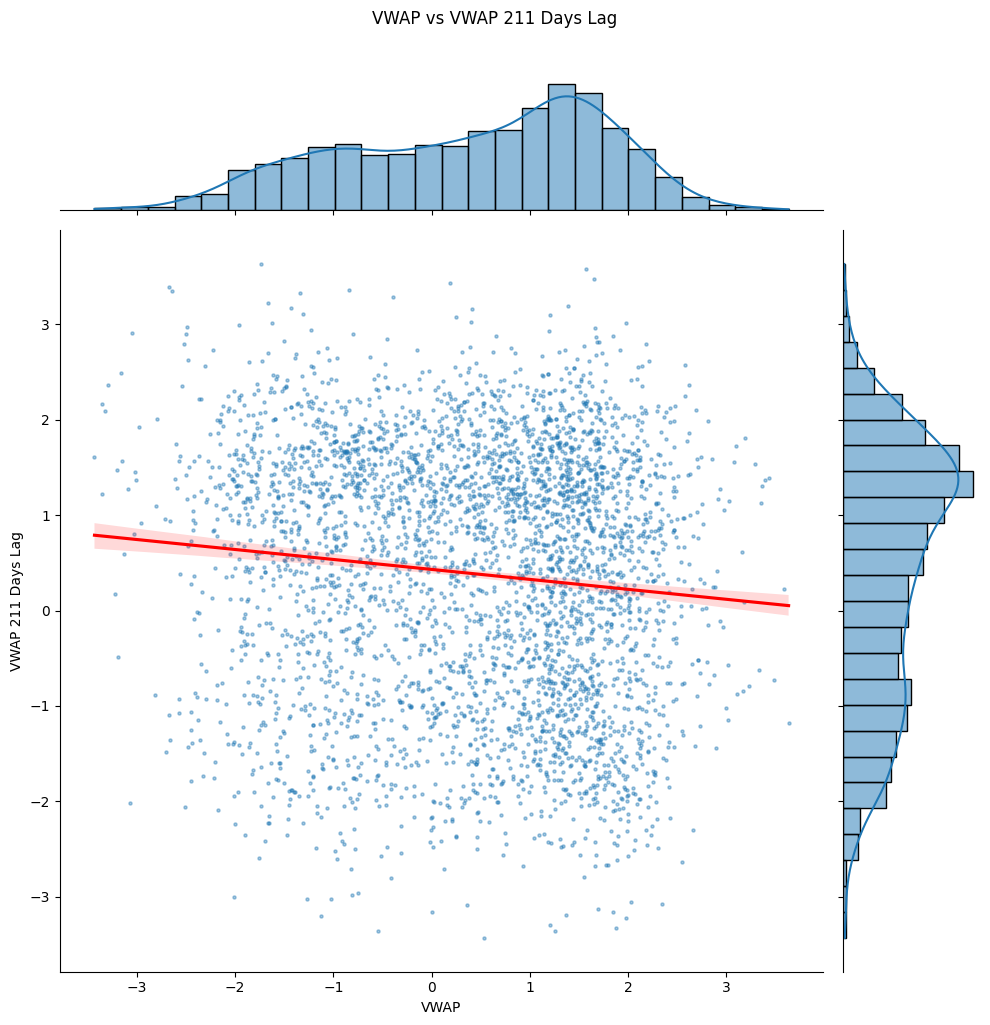

Pearson's correlation coefficient: -0.0502
Pearson's P-value: 0.0016
Spearman's correlation coefficient: -0.0523
Spearman's P-value: 0.0010


In [20]:
import numpy as np
from scipy import stats
import seaborn as sns

shift = 211

x = df['vwap_rw_st'].dropna()
y = df['vwap_rw_st'].shift(-shift).dropna()

min_length = min(len(x), len(y))
x = x[:min_length]
y = y[:min_length]

g = sns.jointplot(x=x, y=y, kind="reg", height=10, ratio=5, scatter_kws={"alpha": 0.4, "s": 5}, line_kws={"color": "red"})

g.fig.suptitle(f'VWAP vs VWAP {shift} Days Lag', y=1.02)
g.ax_joint.set_xlabel('VWAP')
g.ax_joint.set_ylabel(f'VWAP {shift} Days Lag')

pearson_r, pearson_p = stats.pearsonr(x, y)
spearman_r, spearman_p = stats.spearmanr(x, y)

plt.tight_layout()
plt.show()

print(f"Pearson's correlation coefficient: {pearson_r:.4f}")
print(f"Pearson's P-value: {pearson_p:.4f}")
print(f"Spearman's correlation coefficient: {spearman_r:.4f}")
print(f"Spearman's P-value: {spearman_p:.4f}")





Here we can cisulize relationship for different lags

#### Hypothesis Testing

Let's test the hypothesis that the distribution of the avg shock price is different than the mean.

So H0 will be that the avg price for every month is the same.

Chi-square statistic: 247.1982806608285
p-value: 1.1461403050131131e-14
There is a significant difference in the distribution of vwap_rw_st across months (p < 0.05).


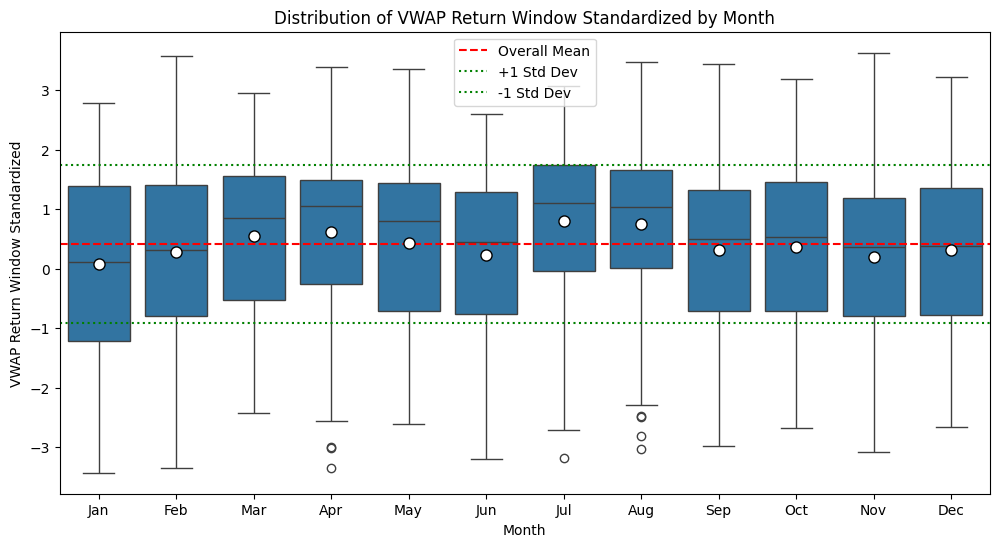

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

bins = pd.cut(df['vwap_rw_st'], bins=10)
contingency_table = pd.crosstab(df['month'], bins)

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference in the distribution of vwap_rw_st across months (p < 0.05).")
else:
    print("There is no significant difference in the distribution of vwap_rw_st across months (p >= 0.05).")

plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='vwap_rw_st', data=df, showmeans=True,
            meanprops={'marker':'o',
                        'markerfacecolor':'white', 
                        'markeredgecolor':'black',
                        'markersize':'8'})

overall_mean = df['vwap_rw_st'].mean()
overall_std = df['vwap_rw_st'].std()

plt.axhline(y=overall_mean, color='r', linestyle='--', label='Overall Mean')
plt.axhline(y=overall_mean + overall_std, color='g', linestyle=':', label='+1 Std Dev')
plt.axhline(y=overall_mean - overall_std, color='g', linestyle=':', label='-1 Std Dev')

plt.title('Distribution of VWAP Return Window Standardized by Month')
plt.xlabel('Month')
plt.ylabel('VWAP Return Window Standardized')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.show()



We reject H0. July and Aug are interesting because they differ the most. I guess it is caused by hype around annual Apple presentation in September.

Chi-square statistic: 31.980447780838244
p-value: 0.6602562543431458
There is no significant difference in the distribution of vwap_rw_st across weekdays (p >= 0.05).


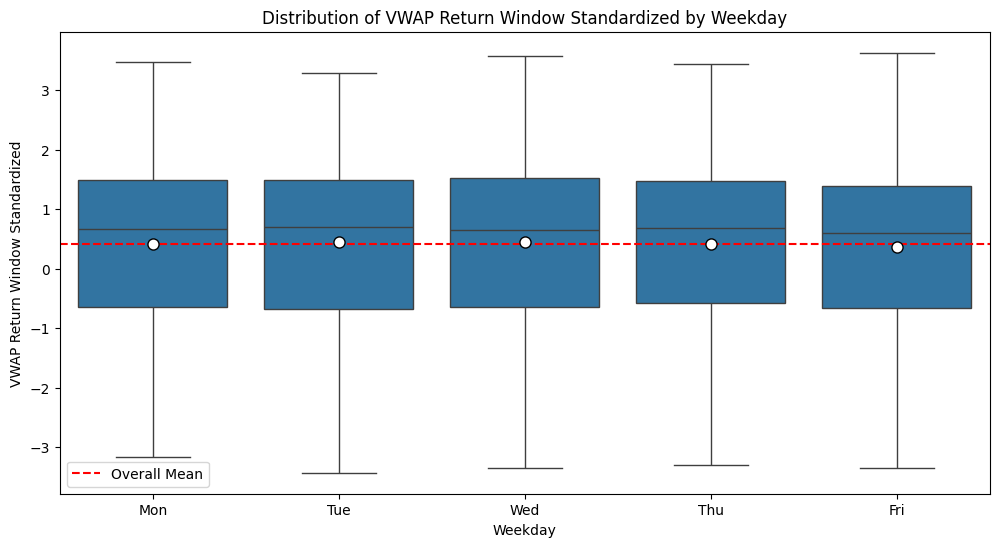

In [22]:
df_weekdays = df[df['weekday'] < 5]

bins = pd.cut(df_weekdays['vwap_rw_st'], bins=10)
contingency_table = pd.crosstab(df_weekdays['weekday'], bins)

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference in the distribution of vwap_rw_st across weekdays (p < 0.05).")
else:
    print("There is no significant difference in the distribution of vwap_rw_st across weekdays (p >= 0.05).")

plt.figure(figsize=(12, 6))
sns.boxplot(x='weekday', y='vwap_rw_st', data=df_weekdays, showmeans=True,
            meanprops={'marker':'o',
                        'markerfacecolor':'white', 
                        'markeredgecolor':'black',
                        'markersize':'8'})

overall_mean = df_weekdays['vwap_rw_st'].mean()

plt.axhline(y=overall_mean, color='r', linestyle='--', label='Overall Mean')

plt.title('Distribution of VWAP Return Window Standardized by Weekday')
plt.xlabel('Weekday')
plt.ylabel('VWAP Return Window Standardized')
plt.xticks(range(5), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])
plt.legend()
plt.show()

Nothing interesting regarding weakly distribution 